# Example on how to transfer models from BPO to snudda
The easiest way to transfer models is to use the script:  
**simple_transfer.py**  

If simple_transfer.py fails, use the below basic options

### Examples
Transfer one model from *source* (-s) and store in *destination* (-d):  

>python simple_transfer.py **-s** ../../Alex_model_repo/models/optim/HBP-2022Q2/str-fs-e161205_FS1-mBE104E-v20220614/
>                          **-d** ../data/neurons/striatum/fs/

To transfer all the models in a directory, use the below command:  

>python simple_transfer.py **-s** ../../Alex_model_repo/models/optim/HBP-2022Q2/ **-d** ../data/neurons/striatum/  **-a 1**

which will transfer all the models in the subdir of HBP-2022Q2 and sort them into respective model directory of striatum (e.g. dspn or fs).  
The sorting assumes that the model name is of the format /region-type-additional_info/, e.g. str-dspn-...  
If this is not the case, the model will be skipped.  

Models that already exist in the output folder will also be skipped.

In order to se all the options, run below command in a terminal:  

>python simple_transfer.py -h

The transfer is an automated version of the 3 options described below.

**TODO:** 
* show non-terminal example here as well

## Prefer to transfer from here directly (or in a script)?
use below examples with updated source and destination  



In [1]:
import os, shutil
import simple_transfer as st

In [2]:
# single model transfer
source = 'example_models/str-fs-model1/'
folder = os.path.basename(os.path.normpath(source))
destination = f'Transfered_models/fs/{folder}'

# the transfer can only be done if the folder does not exist
# CAREFUL: the below command will delete the destination if it already exists (and all existing subfolders)
# uncomment to delete destination (if exists)

#if os.path.exists(destination) and os.path.isdir(destination):
#    shutil.rmtree(destination)

# transfer
st.transfer_single(source, destination)


tranfering source: 
	example_models/str-fs-model1/ 
to destination 
	Transfered_models/fs/str-fs-model1/

using opt_file: val_models.json

mechanims file transfer complete
Parameter file transfer complete
Morphology file transfer complete

---transfer complete---


In [3]:
# transfer all models in subfolders 
source = 'example_models/'
destination = 'Transfered_models/'

# the transfer will skipp folders that already exists in the output (so will skip the folder above if these notebook cells are run in sequence)

# transfer
st.transfer_all(source, destination)

['str-dspn-model1', 'str-dspn-model2', 'str-fs-model1', 'model2']

tranfering source: 
	example_models/str-dspn-model1 
to destination 
	Transfered_models/dspn/str-dspn-model1

using opt_file: hall_of_fame.json

mechanims file transfer complete
Parameter file transfer complete
Morphology file transfer complete

---transfer complete---

tranfering source: 
	example_models/str-dspn-model2 
to destination 
	Transfered_models/dspn/str-dspn-model2

using opt_file: best_models.json

mechanims file transfer complete
Parameter file transfer complete
Morphology file transfer complete

---transfer complete---

Destination: Transfered_models/fs/str-fs-model1 
already exists
--> skipping

celltype can not be extracted from the model name of: model2
in order to work with batch transfer, model names have to be in the format:
region-type-additional_info, e.g. str-dspn-...
--> skipping


## Verify transfer by simulation
Below simulations will only work if the original model has hoc versions of the models stored in a subfolder named checkpoints.  

Use command:

> python simulate.py -p example_models/str-dspn-model2/ -o Transfered_models/dspn/str-dspn-model2/ -s 0 -u 1

where -p is path to the reference model (BPO)  
-o is the flag for the output model (transfered)  
-s is a flag deciding if to print psection or not (see below, 0/1)
-u tells the script to sort the parameters into a structured file

for all options use:

> python simulate.py -h

Here direct comparison of simulations in the two setups is used to verify the transfer. Another way to verify models would be to compare the output of  

>for sec in h.allsec():  
>>    h.psection(sec=sec)  

if the output of this command is identical for transfered and reference models, and the mechanisms are identical -> the models are idential

In [4]:
# or run here... 
import simulate as sim

/home/robert/.local/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


/home/HDD-drive/Repos/BasalGangliaData/examples/example_models/str-dspn-model2/checkpoints
Mod files: "../mechanisms/../mechanisms/bk_ms.mod" "../mechanisms/../mechanisms/cadyn_ms.mod" "../mechanisms/../mechanisms/cal12_ms.mod" "../mechanisms/../mechanisms/cal13_ms.mod" "../mechanisms/../mechanisms/caldyn_ms.mod" "../mechanisms/../mechanisms/can_ms.mod" "../mechanisms/../mechanisms/caq_ms.mod" "../mechanisms/../mechanisms/car_ms.mod" "../mechanisms/../mechanisms/cat32_ms.mod" "../mechanisms/../mechanisms/cat33_ms.mod" "../mechanisms/../mechanisms/Im_ms.mod" "../mechanisms/../mechanisms/kaf_ms.mod" "../mechanisms/../mechanisms/kas_ms.mod" "../mechanisms/../mechanisms/kdr_ms.mod" "../mechanisms/../mechanisms/kir_ms.mod" "../mechanisms/../mechanisms/naf_ms.mod" "../mechanisms/../mechanisms/sk_ms.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../../mechanisms/bk_ms.mod
 -> NMODL ../../mechanisms/cadyn_ms.mod
 -> NMODL ../../mechanisms/cal12_ms.mod
 ->

Translating bk_ms.mod into /home/HDD-drive/Repos/BasalGangliaData/examples/example_models/str-dspn-model2/checkpoints/x86_64/bk_ms.c
Translating cadyn_ms.mod into /home/HDD-drive/Repos/BasalGangliaData/examples/example_models/str-dspn-model2/checkpoints/x86_64/cadyn_ms.c
Translating cal12_ms.mod into /home/HDD-drive/Repos/BasalGangliaData/examples/example_models/str-dspn-model2/checkpoints/x86_64/cal12_ms.c
Thread Safe
Thread Safe
Thread Safe
Translating cal13_ms.mod into /home/HDD-drive/Repos/BasalGangliaData/examples/example_models/str-dspn-model2/checkpoints/x86_64/cal13_ms.c
Translating caldyn_ms.mod into /home/HDD-drive/Repos/BasalGangliaData/examples/example_models/str-dspn-model2/checkpoints/x86_64/caldyn_ms.c
Thread Safe
Translating can_ms.mod into /home/HDD-drive/Repos/BasalGangliaData/examples/example_models/str-dspn-model2/checkpoints/x86_64/can_ms.c
Thread Safe
Thread Safe
Translating caq_ms.mod into /home/HDD-drive/Repos/BasalGangliaData/examples/example_models/str-dspn-mo

 -> NMODL ../../mechanisms/Im_ms.mod
 -> NMODL ../../mechanisms/kaf_ms.mod
 -> NMODL ../../mechanisms/kas_ms.mod
 -> NMODL ../../mechanisms/kdr_ms.mod
 -> NMODL ../../mechanisms/kir_ms.mod
 -> NMODL ../../mechanisms/naf_ms.mod
 -> NMODL ../../mechanisms/sk_ms.mod
 -> Compiling bk_ms.c
 -> Compiling cadyn_ms.c
 -> Compiling cal12_ms.c
 -> Compiling cal13_ms.c
 -> Compiling caldyn_ms.c
 -> Compiling can_ms.c
 -> Compiling caq_ms.c
 -> Compiling car_ms.c
 -> Compiling cat32_ms.c
 -> Compiling cat33_ms.c
 -> Compiling Im_ms.c
 -> Compiling kaf_ms.c
 -> Compiling kas_ms.c
 -> Compiling kdr_ms.c
 -> Compiling kir_ms.c
 -> Compiling naf_ms.c
 -> Compiling sk_ms.c
 => LINKING shared library ./libnrnmech.so
 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
1. simulating reference model...
example_models/str-dspn-model2//morphology/21-6-DE-cor-rep-ax-res3.swc
2.0 upgrading parameters...
-param set Transfered_models/dspn/str-dspn-model2/0 done!
2.1 simu

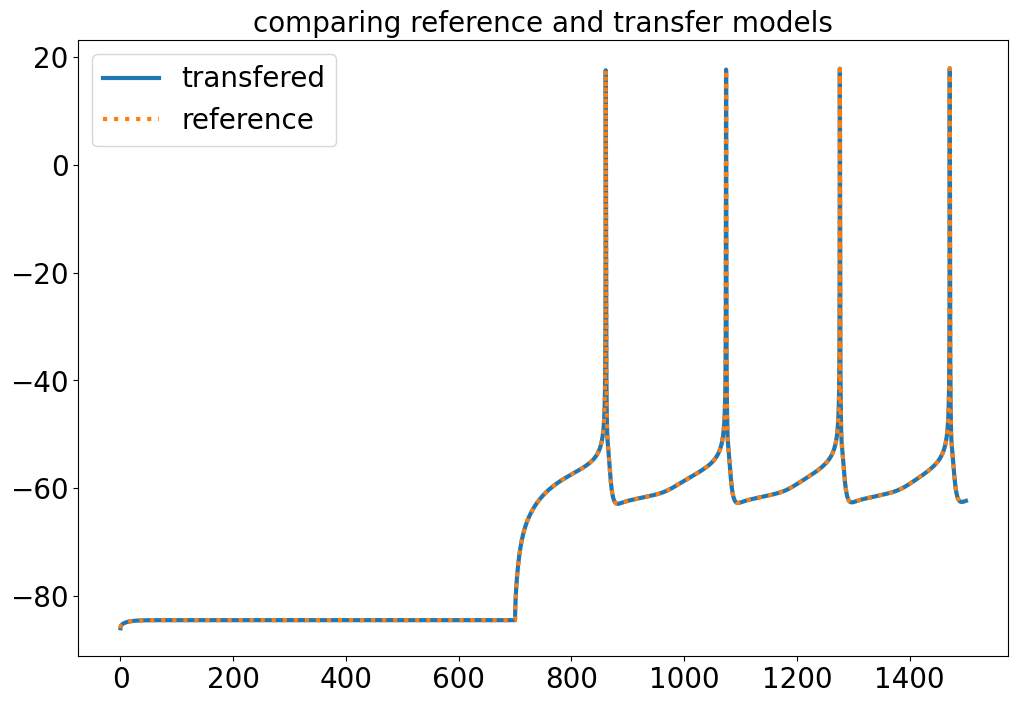

In [5]:
reference_model = 'example_models/str-dspn-model2/'
transfered_model = 'Transfered_models/dspn/str-dspn-model2/'
model_id = 0

t,v = sim.simulate_org_model(   reference_model,
                                model_id,
                                print_psection=False,
                                return_tv=True)
    
sim.simulate_transfered_model(  reference_model, 
                                transfered_model, 
                                model_id,  
                                upgrade_params=True,
                                print_psection=False,
                                ref_tv=[t,v])

# Old content: manual transfer
below is the old content, explaining the format expected and the basic commands.  
If simple transfers fails, try these instead.

## Option 1: Give the path to specific files
all below describes the basic underlying structure and commands used in simple_transfer.py.  
In order to transfer validated morp-parameter combinations use the last option (not tested in simple_transfer yet)

### Required files
    Mandatory
    * parameters.json
    * mechanisms.json
    vERSION - either 1 or 2 or 2 + 3
        1. best_models.json (if you are using the direct output of the optimizer)
        2. hall_of_fame.json (if you have filtered the parameter sets against more validations)
        3. val_models.json (if you  have varied the morphology used within the original optimization and hence have more morph-parameter combinations)

## Option 2: Follow the structure of the BluePyOpt model directory

The model optimisation could be a folder, containing the follow files and subdirectories:

    model/
        config/
                parameters.json
                mechanisms.json
        morphology/
                contain one or several morphologies (.swc)
                used for the model
        hall_of_fame.json ( contain the parameter sets - the results of the optimisation)
        val_models.json ( optional file, if several morphologies are used, the parameter sets which match each morphology)
        
For an example of the structure and contents of the files, see **BasalGangliaData/tests/test_data/example_variation_source**

*Contact Alex Kozlov for more information   

# Examples

Create directory for the model.
```
    Within BasalGangliaData, the models used in Snudda are saved under
    BasalGangliaData/data/neurons/name_of_nucleus

    **If the nucleus does not exist, add a folder for the new nucleus**

    Next create (if it does not already exist), a folder for each cell type within the nucleus

    Lastly, create the folder for each model of the cell type 
    (this folder will be the **destination** used in the code below)

     For example,

     BasalGanglia/data/neurons/newnucleus/new_celltype/new_model
```    

In [4]:

import sys
sys.path.append("../tools")
source = "where the Bluepyopt optimisation, with the structure described above"
destination = "tmp/stn/type-1/model-1"


## Option 1 - version 1

In [5]:
from transfer.mechanisms import transfer_mechanisms
path_to_mechanisms = "/home/jofrony/Desktop/STN_optimize/config"
transfer_mechanisms(direct_path=path_to_mechanisms, destination=destination)




FileNotFoundError: [Errno 2] No such file or directory: 'tmp/stn/type-1/model-1'

In [ ]:
from transfer.parameters import transfer_parameters
direct_path_param="/home/jofrony/Desktop/STN_optimize/config/parameters.json"
direct_path_best_models="/home/jofrony/Desktop/STN_optimize/Results/all/OPFigures22/best_models.json"

transfer_parameters(direct_path_param=direct_path_param,
                        direct_path_best_models=direct_path_best_models, destination=destination)

In [ ]:

from transfer.morphology import transfer_morphologies
direct_path_morph = "/home/jofrony/Desktop/STN_optimize/morphology"
transfer_morphologies(direct_path_morph=direct_path_morph,
                              destination=destination)


In [ ]:
from meta.create_meta import write_meta
write_meta(directory=destination)

## Option 1 - version 2 

Exchange best_models.json for hall_of_fame.json

## Option 1 - version 2 + 3

### Transfer selected models from val_models.json

In [ ]:
from transfer.selected_models import transfer_selected_models
transfer_selected_models(source, destination)